# SPRESENSE-CommonSense Sensor Fusion
## Data Collection 

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from scipy.stats import skew, kurtosis
from scipy import signal
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (10,5)

## Functions

In [10]:
 def load_data(file_name):
    df = pd.read_csv('./data/'+file_name+'.csv')
    print (file_name+' - Shape: '+str(df.shape))
    return df

In [26]:
bath.columns

Index(['count', 'pres', 'temp', 'humi', 'voc', 'red', 'green', 'blue', 'ir'], dtype='object')

In [27]:
 def plot_data(df, title):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 6))
    axes[0, 0].plot(df['pres'])
    axes[0, 0].set_title('pres')
    axes[0, 1].plot(df['temp'])
    axes[0, 1].set_title('temp')
    axes[1, 0].plot(df['humi'])
    axes[1, 0].set_title('humi')
    axes[1, 1].plot(df['voc'])
    axes[1, 1].set_title('voc')
    axes[2, 0].plot(df['red'])
    axes[2, 0].set_title('red')
    axes[2, 1].plot(df['green'])
    axes[2, 1].set_title('green')
    axes[3, 0].plot(df['blue'])
    axes[3, 0].set_title('blue')
    axes[3, 1].plot(df['ir'])
    axes[3, 1].set_title('ir')
    plt.tight_layout()
    plt.suptitle('CommonSense Sensors - '+title, fontsize=16, y=1.02)
    
    plt.show()

In [70]:
def plot_pairplot(df, title):
    sns.pairplot(df)
    plt.suptitle('Pairplot of Variables - '+title, fontsize=18, y=1.02)
    #plt.subplots_adjust(top=0.9)
    plt.show()

In [139]:
def normalize_train_data(df):
    """
    Normalizes the numerical features of a dataset and returns a tuple containing three elements:
        1.The normalized data
        2. A list of the mins of each column.
        3. A list of the ranges of each column.
    """
    mins=[]
    ranges=[]
    # get numerical features
    df_scaled = df.iloc[:, :-1]
  
    # apply normalization 
    for column in df_scaled.columns: 
        min = df_scaled[column].min()
        range = (df_scaled[column].max() - min)
        df_scaled[column] = (df_scaled[column] - min) / range 
        
        # Collect min and range values
        mins.append(min)
        ranges.append(range)
   
    # Combine the normalized features and output into a new dataframe   
    df_scaled['class'] =  df['class']  
    
    return df_scaled, mins, ranges

In [145]:
def normalize_test_data(df, mins, ranges):
    # Select the numerical columns to be standardized
    numerical_cols = df.columns[0:-1]

    # normalizeize the numerical columns
    df[numerical_cols] = (df[numerical_cols] - mins) / ranges

    return df

## Download, analyse and clean Raw Data

In [11]:
ls ./data

bathroom.csv* kitchen.csv*  lab.csv*      service.csv*


In [63]:
bath = load_data('bathroom')
kit = load_data('kitchen')
lab = load_data('lab')
serv = load_data('service')

bathroom - Shape: (728, 9)
kitchen - Shape: (770, 9)
lab - Shape: (719, 9)
service - Shape: (765, 9)


### Bathroom data

In [41]:
print(bath.head())

   count    pres   temp  humi    voc   red  green  blue   ir
0      0  897.16  28.04  30.8  30211   936    981   344  134
1      1  897.14  28.05  31.5  30159  1034   1002   280   72
2      2  897.18  27.99  31.1  30182   966    950   266   68
3      3  897.09  27.98  31.0  30203   949    985   347  135
4      4  897.16  28.02  31.0  30202   958    964   332  127


In [45]:
bath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   728 non-null    int64  
 1   pres    728 non-null    float64
 2   temp    728 non-null    float64
 3   humi    728 non-null    float64
 4   voc     728 non-null    int64  
 5   red     728 non-null    int64  
 6   green   728 non-null    int64  
 7   blue    728 non-null    int64  
 8   ir      728 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 51.3 KB


In [18]:
bath.describe()

count        pres        temp        humi           voc  \
count  728.000000  728.000000  728.000000  728.000000    728.000000   
mean   358.534341  897.175124   24.527720   39.427747  30314.935440   
std    210.241072    0.099311    0.553109    1.256433   1307.304662   
min      0.000000  896.900000   24.210000   30.800000  29879.000000   
25%    176.750000  897.090000   24.260000   38.800000  30247.000000   
50%    358.500000  897.190000   24.390000   39.700000  30262.000000   
75%    540.250000  897.250000   24.530000   40.400000  30286.000000   
max    722.000000  897.430000   28.050000   40.900000  65530.000000   

               red        green        blue          ir  
count   728.000000   728.000000  728.000000  728.000000  
mean     98.528846   109.387363   50.677198   49.836538  
std      92.351233    93.608573   31.303966   19.406445  
min      28.000000    30.000000   13.000000   18.000000  
25%      61.000000    70.000000   35.000000   33.000000  
50%      94.000000   106.000000   50.000000   51.500000  
75%     120.000000   133.000000   63.000000   66.000000  
max    1179.000000  1133.000000  352.000000  149.000000

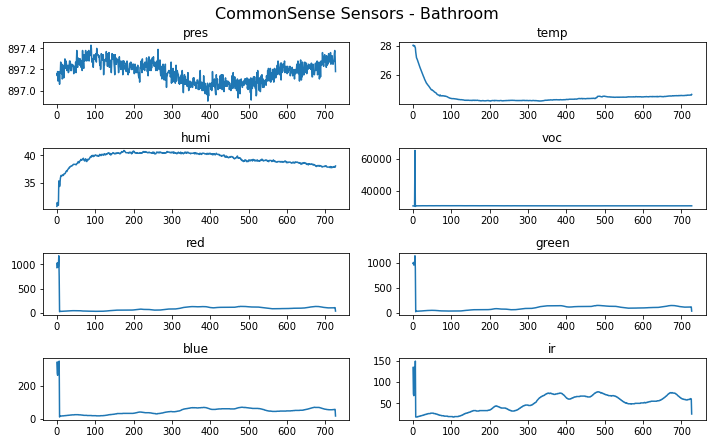

In [29]:
plot_data(bath, "Bathroom")

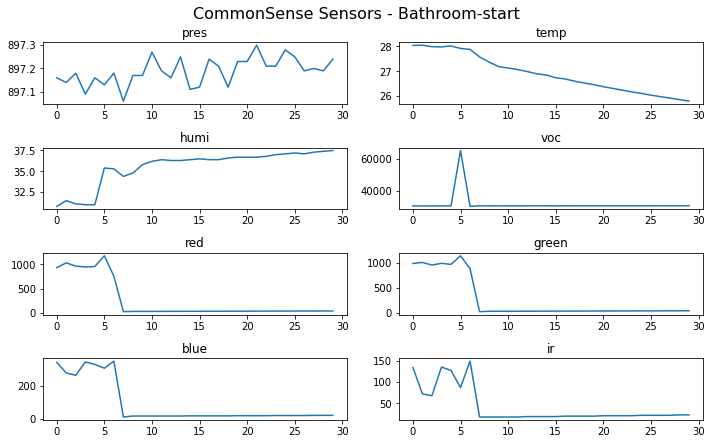

In [51]:
plot_data(bath[:30], "Bathroom-start")

In [64]:
bath = bath[10:]
bath.shape

(718, 9)

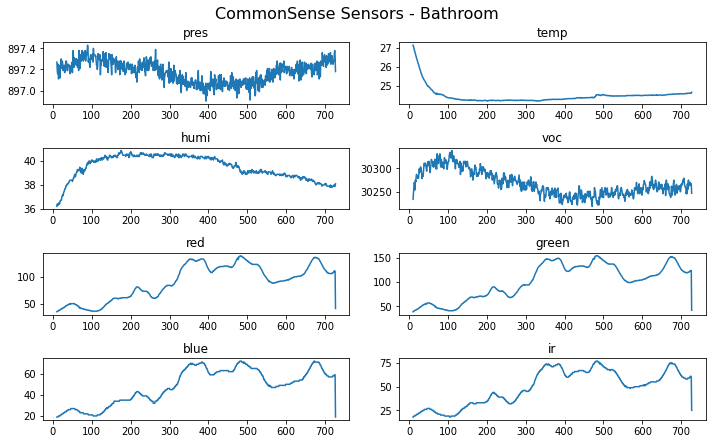

In [65]:
plot_data(bath, "Bathroom")

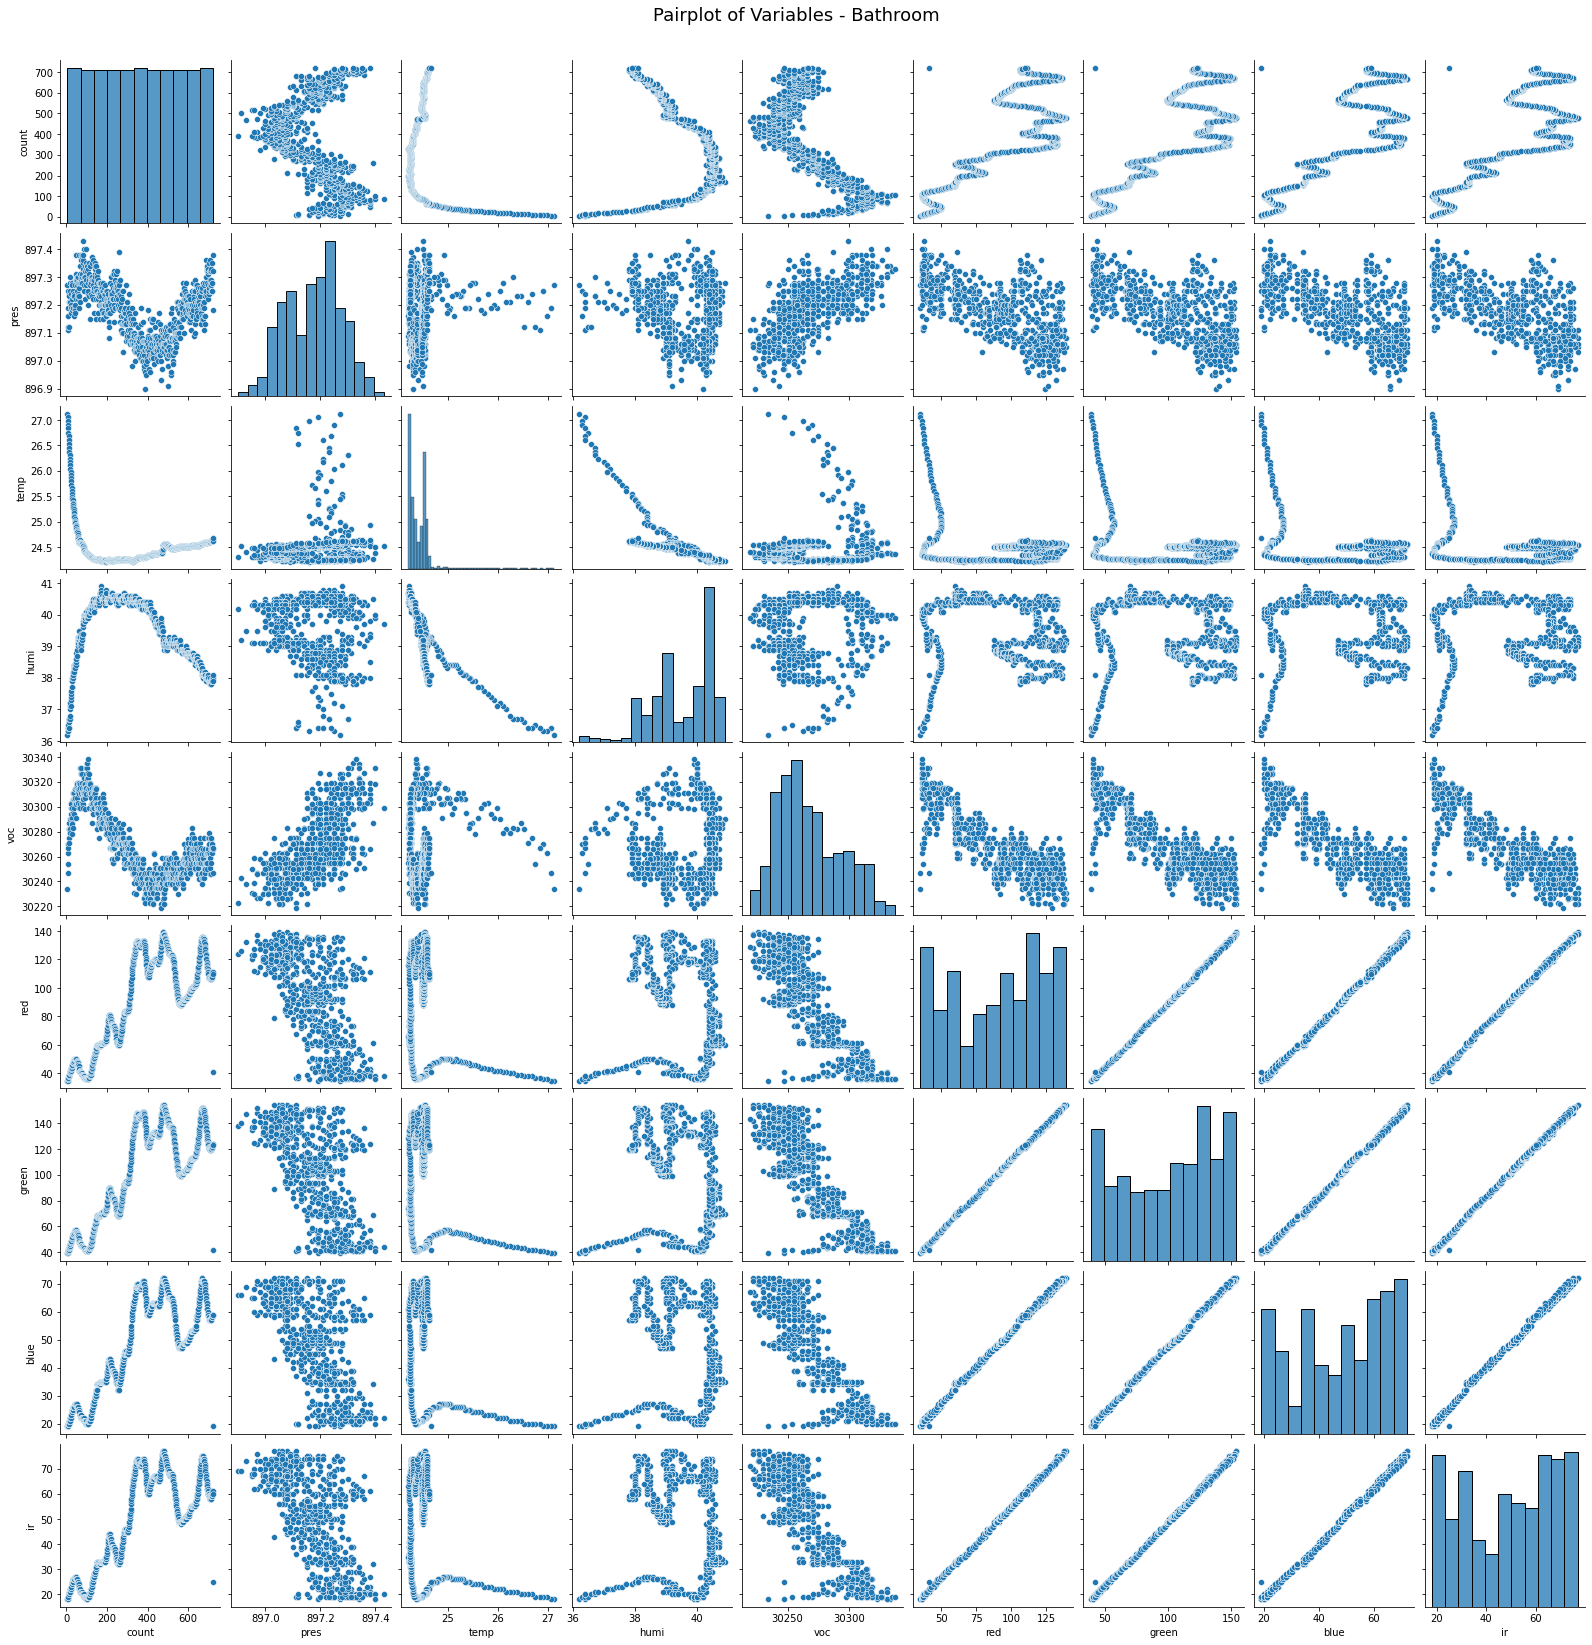

In [74]:
plot_pairplot(bath, 'Bathroom')

### Kitchen Data

In [46]:
kit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   770 non-null    int64  
 1   pres    770 non-null    float64
 2   temp    770 non-null    float64
 3   humi    770 non-null    float64
 4   voc     770 non-null    int64  
 5   red     770 non-null    int64  
 6   green   770 non-null    int64  
 7   blue    770 non-null    int64  
 8   ir      770 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.3 KB


In [52]:
kit.describe()

count        pres        temp        humi           voc  \
count  770.000000  770.000000  770.000000  770.000000    770.000000   
mean   384.500000  897.561312   27.507091   30.910649  30520.423377   
std    222.424144    0.195358    0.472399    1.308417   1265.429446   
min      0.000000  897.170000   23.730000   30.200000  29763.000000   
25%    192.250000  897.412500   27.452500   30.400000  30434.000000   
50%    384.500000  897.560000   27.635000   30.600000  30454.000000   
75%    576.750000  897.730000   27.720000   31.000000  30507.000000   
max    769.000000  897.970000   27.850000   44.800000  65530.000000   

              red       green        blue          ir  
count  770.000000  770.000000  770.000000  770.000000  
mean    23.853247   24.140260   10.205195   19.201299  
std     18.484184   22.161391    8.864210    8.010218  
min      5.000000    4.000000    1.000000    4.000000  
25%     12.000000   12.000000    5.000000   11.000000  
50%     23.000000   23.000000   10.000000   20.000000  
75%     29.000000   29.000000   13.000000   26.000000  
max    158.000000  185.000000   91.000000  103.000000

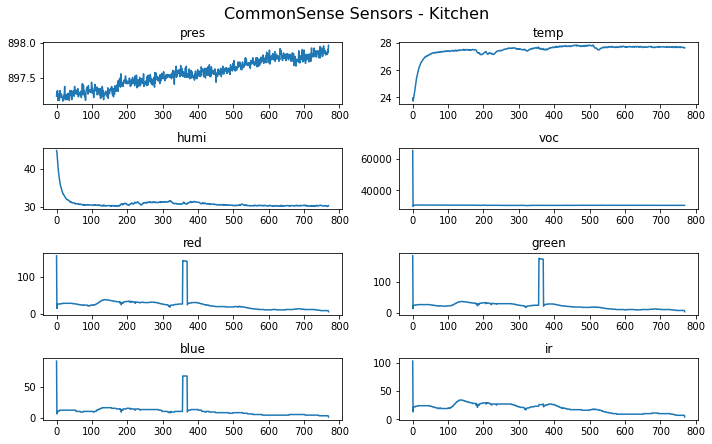

In [53]:
plot_data(kit, "Kitchen")

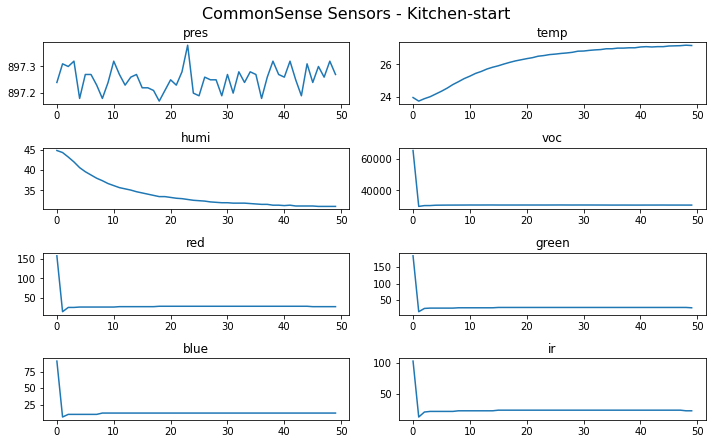

In [54]:
plot_data(kit[:50], "Kitchen-start")

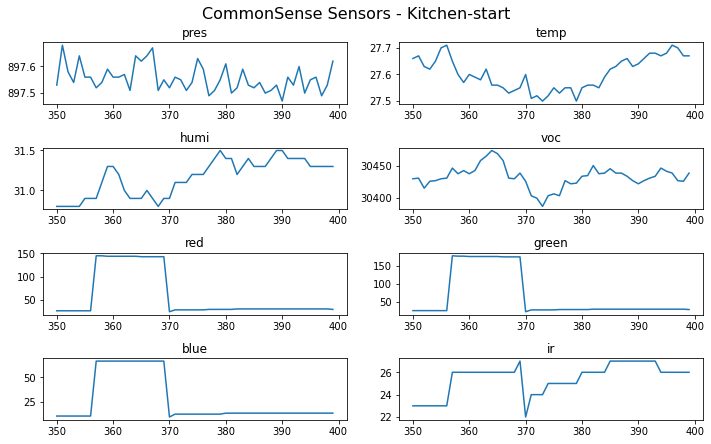

In [55]:
plot_data(kit[350:400], "Kitchen-start")

(760, 9)


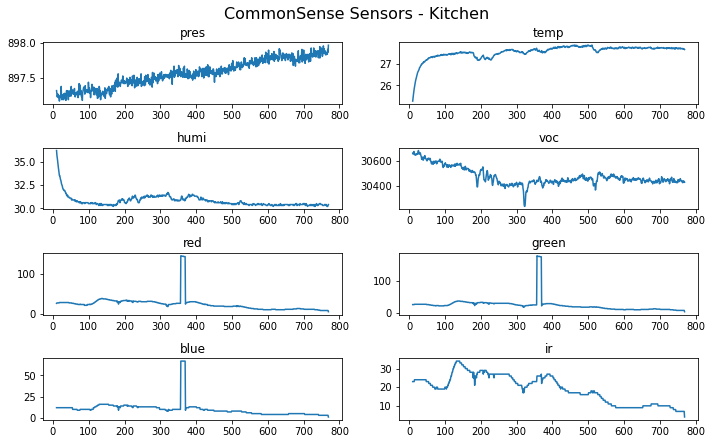

In [66]:
kit = kit[10:]
print(kit.shape)
plot_data(kit, "Kitchen")

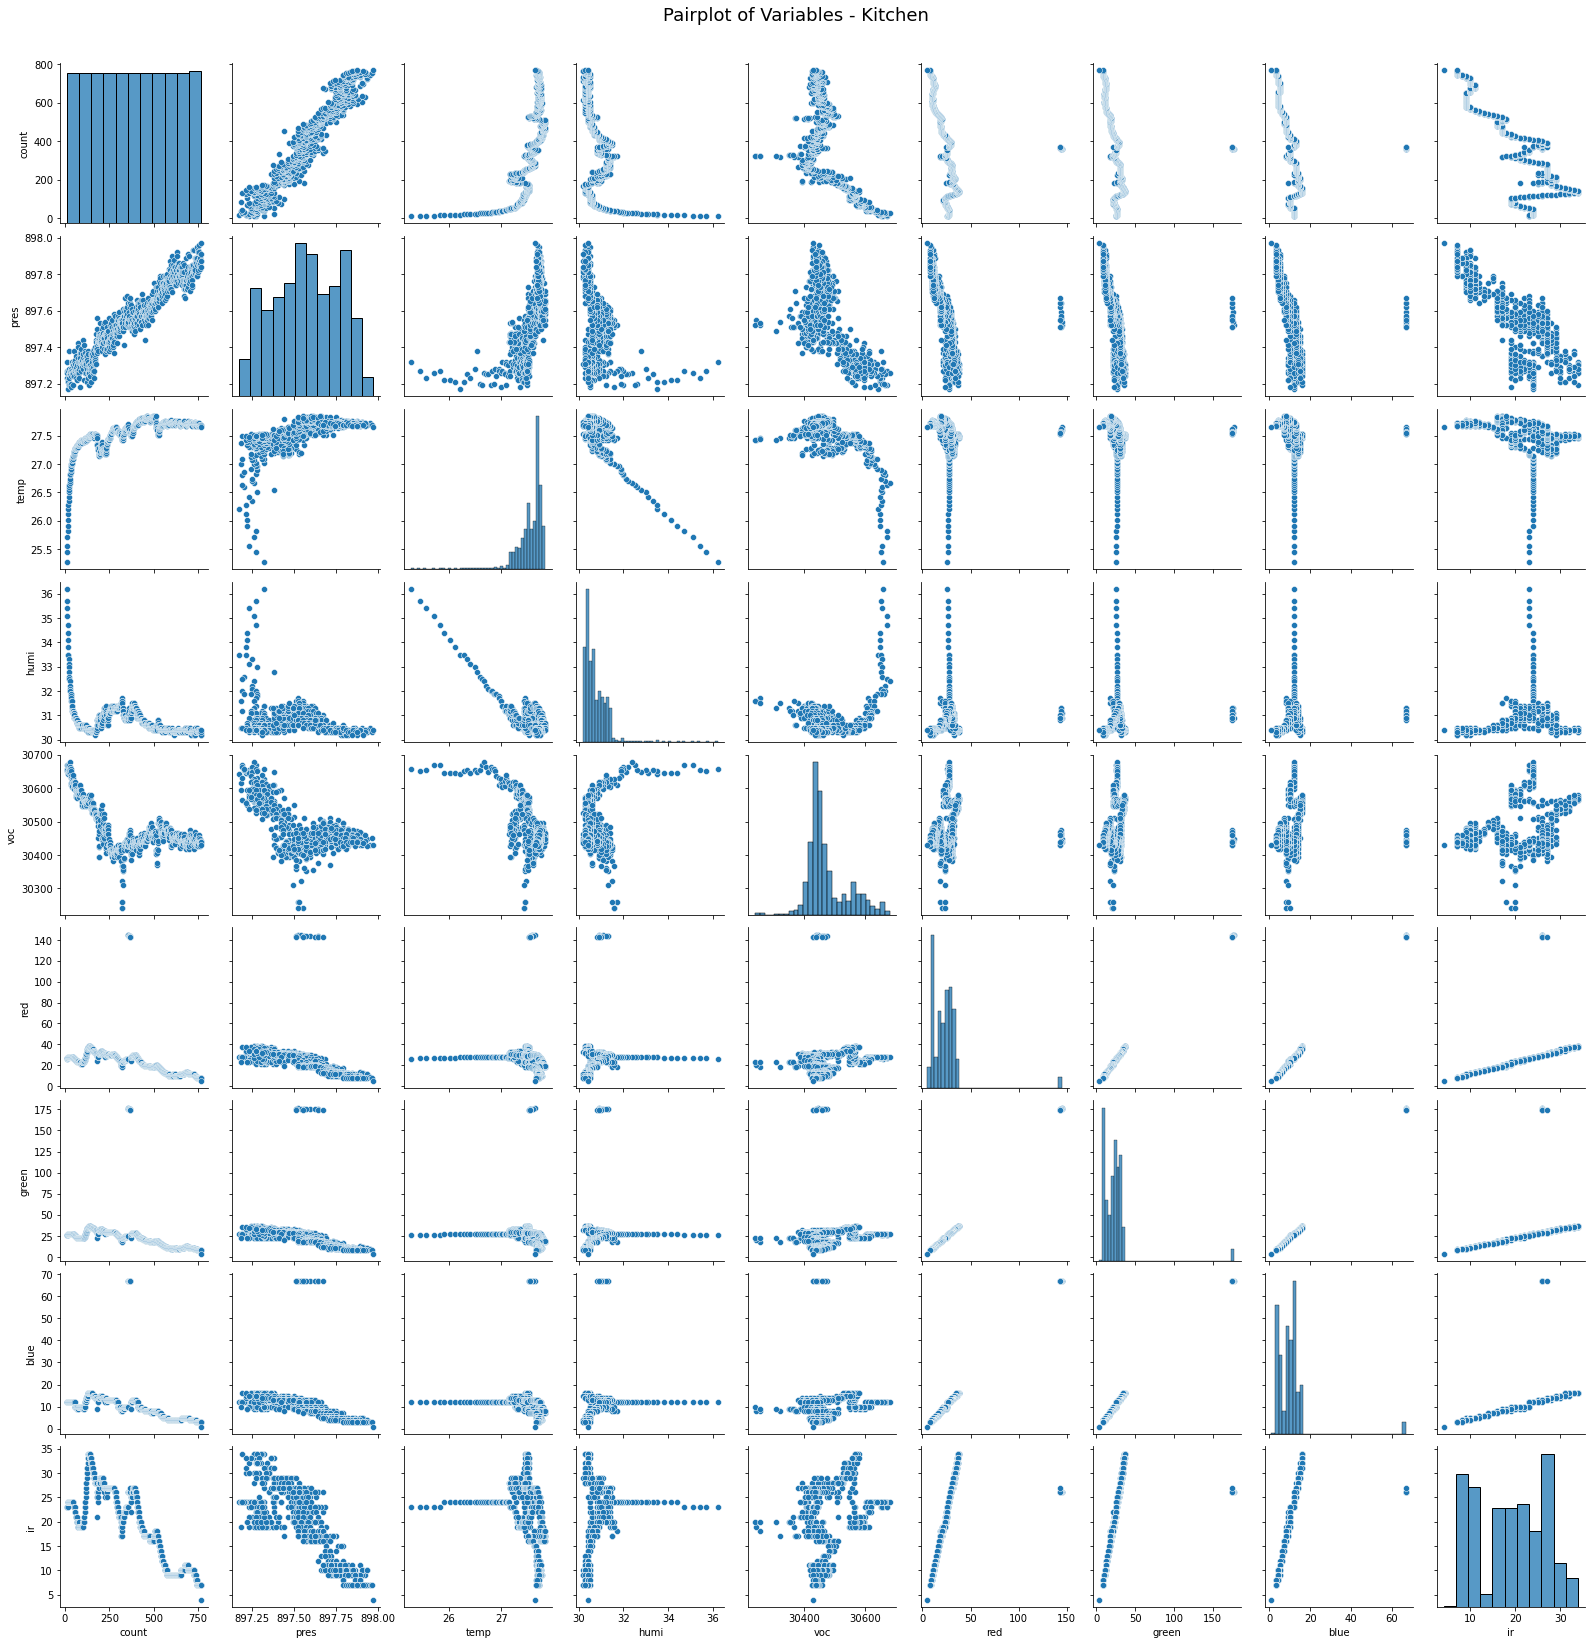

In [73]:
plot_pairplot(kit, 'Kitchen')

### Lab data

In [47]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   719 non-null    int64  
 1   pres    719 non-null    float64
 2   temp    719 non-null    float64
 3   humi    719 non-null    float64
 4   voc     719 non-null    int64  
 5   red     719 non-null    int64  
 6   green   719 non-null    int64  
 7   blue    719 non-null    int64  
 8   ir      719 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 50.7 KB


In [56]:
lab.describe()

count        pres        temp        humi           voc  \
count  719.000000  719.000000  719.000000  719.000000    719.000000   
mean   359.000000  896.511307   27.869346   31.084284  30158.031989   
std    207.701709    0.408367    0.099692    0.293505     28.082605   
min      0.000000  895.850000   27.660000   30.500000  30066.000000   
25%    179.500000  896.120000   27.790000   30.900000  30139.000000   
50%    359.000000  896.420000   27.870000   31.000000  30158.000000   
75%    538.500000  896.930000   27.940000   31.200000  30182.000000   
max    718.000000  897.260000   28.120000   31.900000  30215.000000   

              red        green        blue          ir  
count  719.000000   719.000000  719.000000  719.000000  
mean   860.682893   874.632823  273.812239   84.198887  
std     42.752669    57.391888   35.265757   24.168990  
min    774.000000   759.000000  203.000000   31.000000  
25%    839.000000   844.000000  254.500000   73.000000  
50%    859.000000   872.000000  272.000000   85.000000  
75%    887.000000   912.000000  299.500000   99.000000  
max    959.000000  1004.000000  354.000000  140.000000

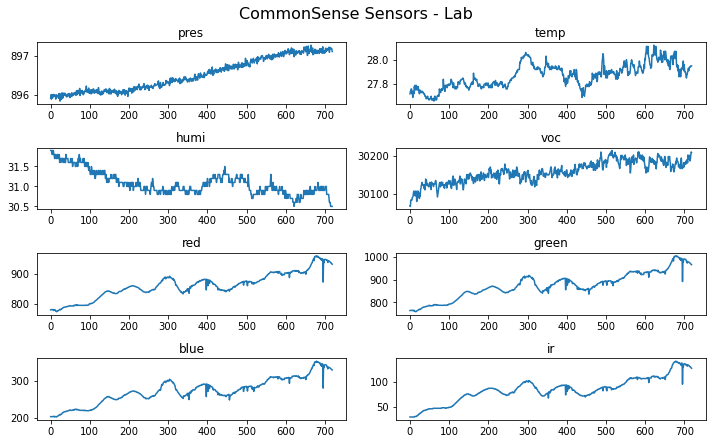

In [57]:
plot_data(lab, "Lab")

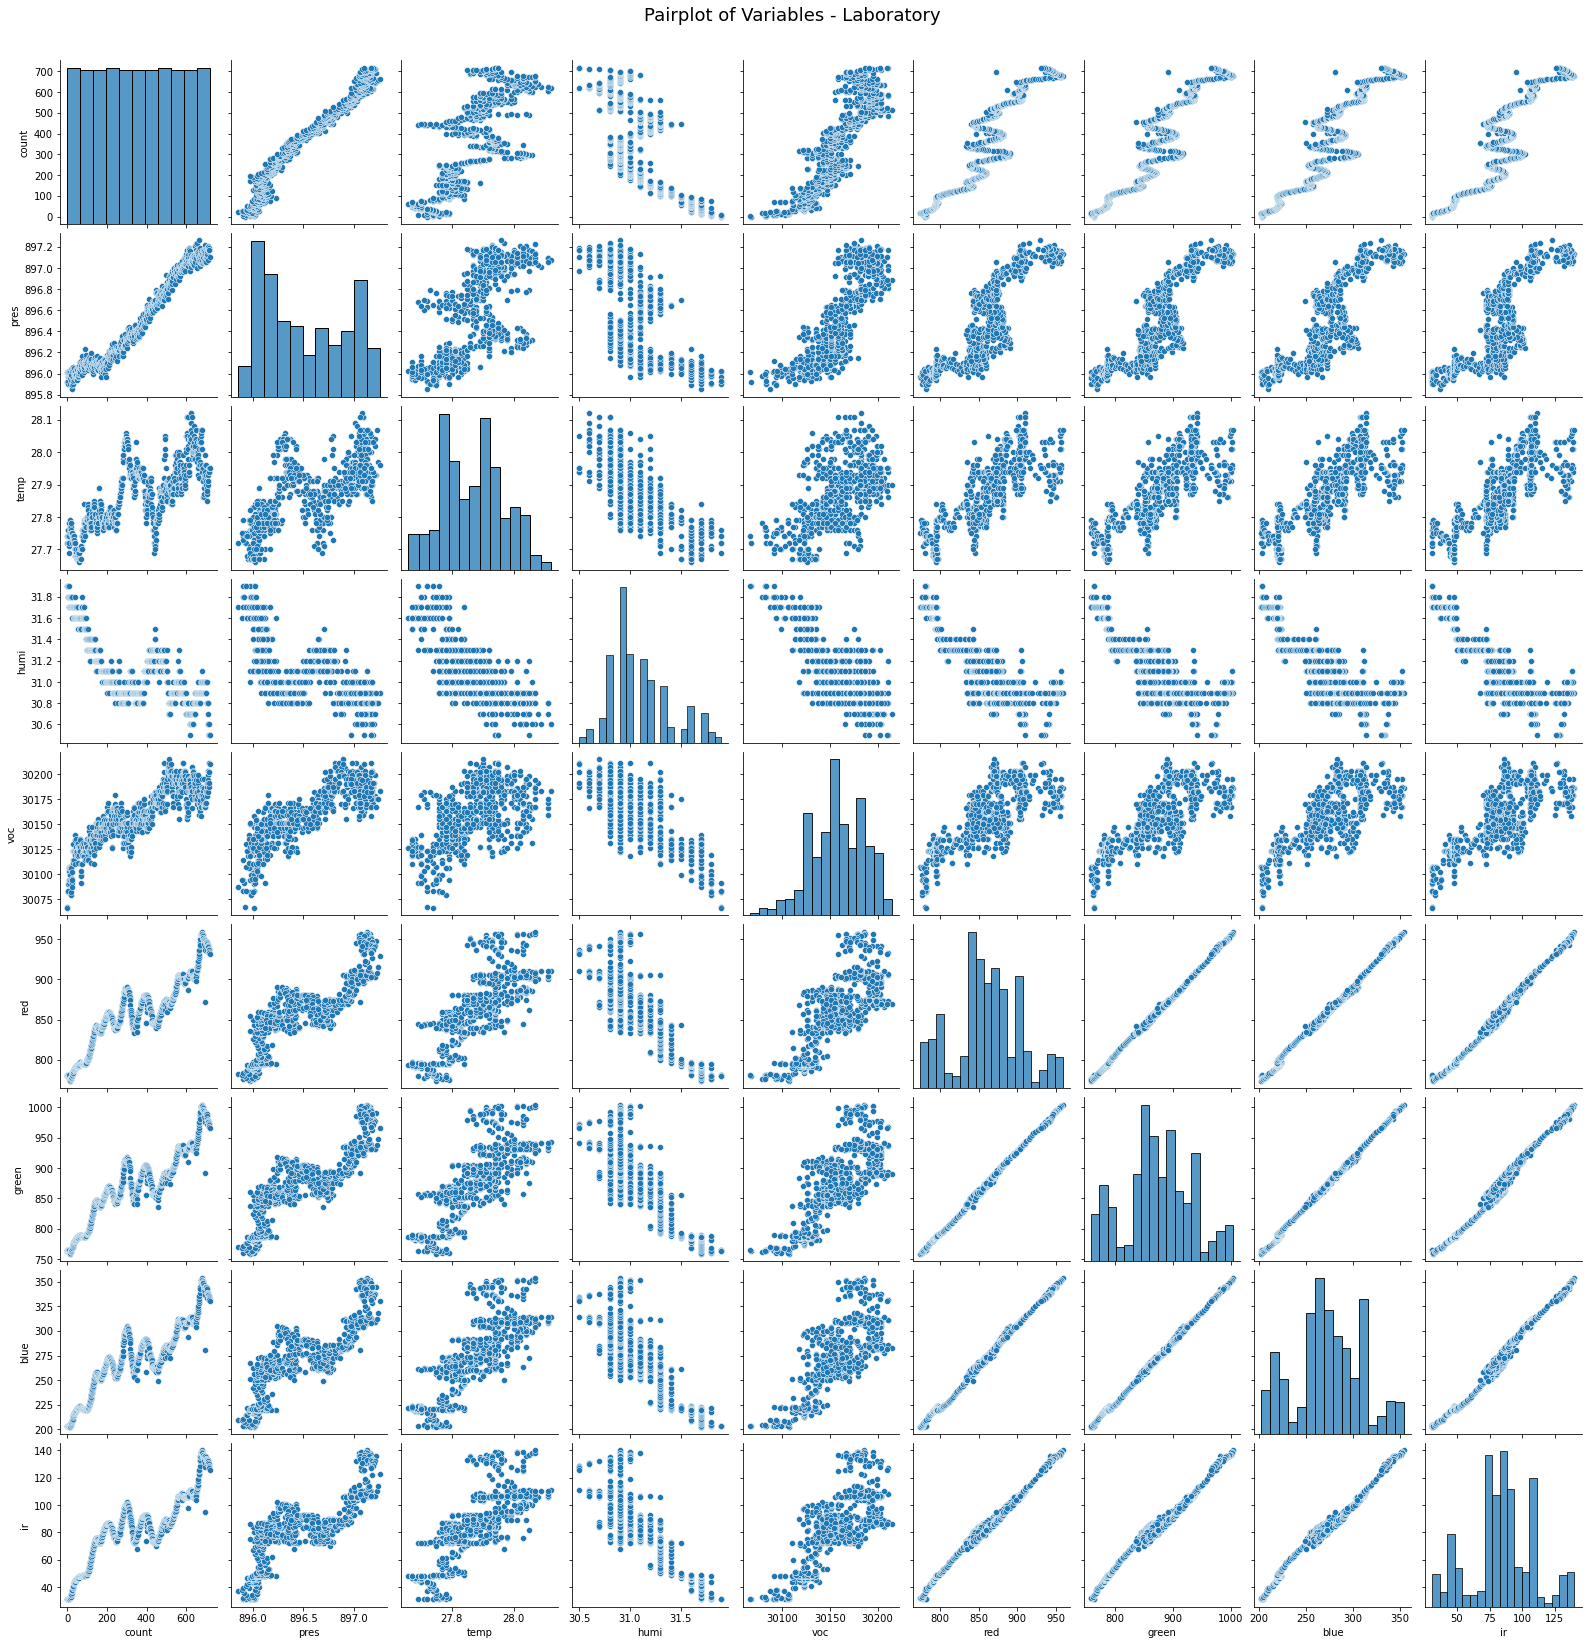

In [72]:
plot_pairplot(lab, 'Laboratory')

### Service data

In [49]:
serv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   765 non-null    int64  
 1   pres    765 non-null    float64
 2   temp    765 non-null    float64
 3   humi    765 non-null    float64
 4   voc     765 non-null    int64  
 5   red     765 non-null    int64  
 6   green   765 non-null    int64  
 7   blue    765 non-null    int64  
 8   ir      765 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 53.9 KB


In [58]:
serv.describe()

count        pres        temp        humi           voc  \
count  765.000000  765.000000  765.000000  765.000000    765.000000   
mean   382.000000  897.935438   21.627412   33.976209  32020.064052   
std    220.980768    0.065144    0.519962    0.629829   1227.212523   
min      0.000000  897.740000   21.020000   32.000000  30423.000000   
25%    191.000000  897.890000   21.200000   33.600000  31842.000000   
50%    382.000000  897.940000   21.580000   34.100000  32030.000000   
75%    573.000000  897.980000   21.890000   34.500000  32134.000000   
max    764.000000  898.120000   24.330000   38.900000  65530.000000   

              red       green        blue          ir  
count  765.000000  765.000000  765.000000  765.000000  
mean   456.028758  493.610458  259.477124  305.458824  
std    240.911259  258.872151  137.833446  172.009984  
min    118.000000  125.000000   62.000000   74.000000  
25%    210.000000  224.000000  112.000000  138.000000  
50%    456.000000  515.000000  294.000000  282.000000  
75%    658.000000  702.000000  369.000000  462.000000  
max    933.000000  991.000000  512.000000  663.000000

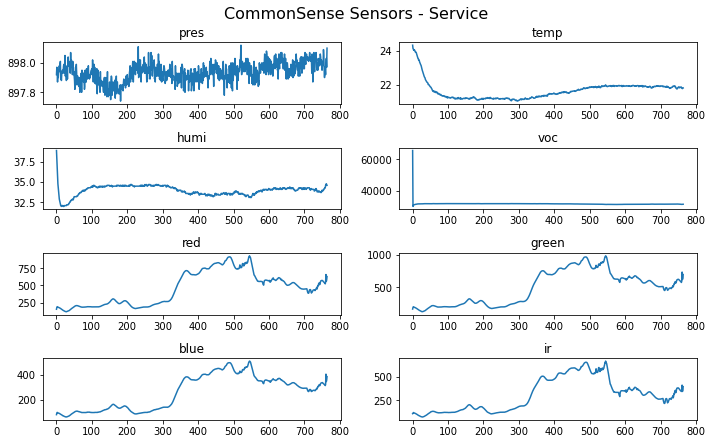

In [59]:
plot_data(serv, "Service")

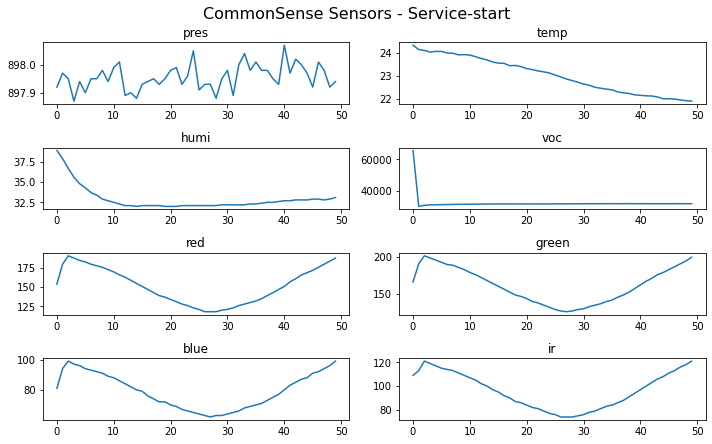

In [60]:
plot_data(serv[:50], "Service-start")

(755, 9)


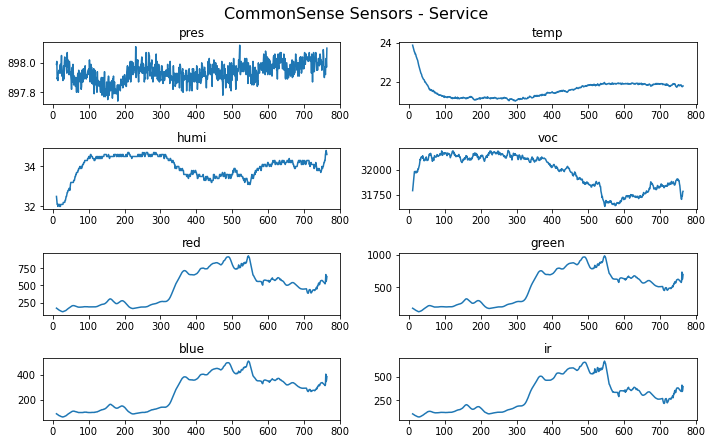

In [67]:
serv = serv[10:]
print(serv.shape)
plot_data(serv, "Service")

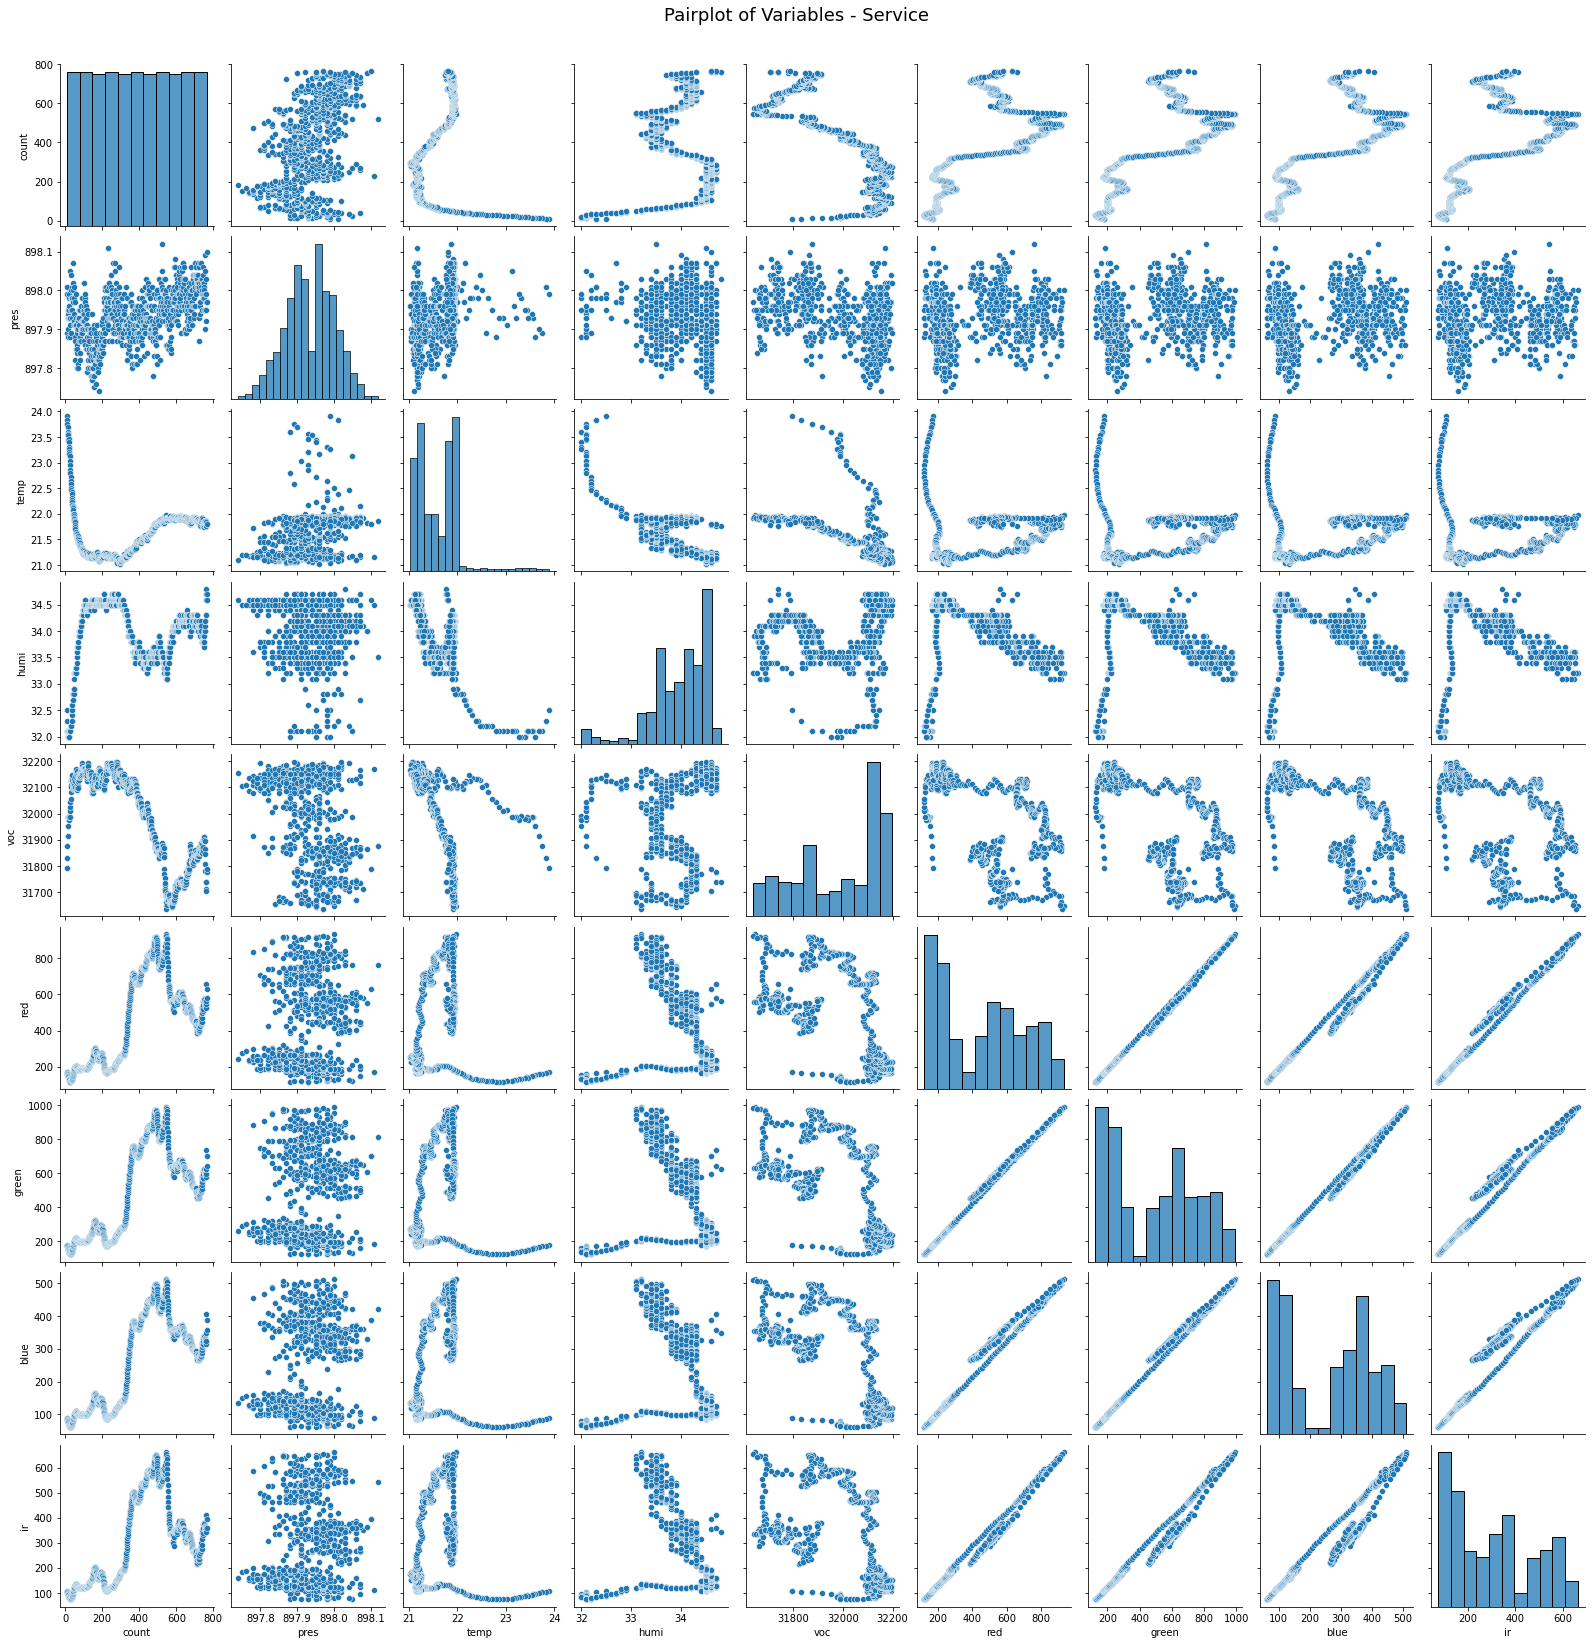

In [71]:
plot_pairplot(serv, 'Service')

### Spliting data

In [ ]:
kit['class']='kit'
bath['class']='bath'
lab['class']='lab'
serv['class']='serv'

In [85]:
kit.head(2)

count    pres   temp  humi    voc  red  green  blue  ir class
10     10  897.32  25.27  36.2  30658   26     26    12  23   kit
11     11  897.27  25.44  35.7  30651   27     26    12  23   kit

In [86]:
kit_train = kit[:-100]
kit_test = kit[-100:]
kit_train.shape, kit_test.shape

((660, 10), (100, 10))

In [90]:
bath_train = bath[:-100]
bath_test = bath[-100:]
bath_train.shape, bath_test.shape

((618, 10), (100, 10))

In [91]:
lab_train = lab[:-100]
lab_test = lab[-100:]
lab_train.shape, lab_test.shape

((619, 10), (100, 10))

In [92]:
serv_train = serv[:-100]
serv_test = serv[-100:]
serv_train.shape, serv_test.shape

((655, 10), (100, 10))

## Creating single datasets

In [93]:
# training
df_train = pd.concat([kit_train, bath_train], ignore_index=True)
df_train = pd.concat([df_train, lab_train], ignore_index=True)
df_train = pd.concat([df_train, serv_train], ignore_index=True)
df_train.shape

(2552, 10)

In [94]:
# training
df_test = pd.concat([kit_test, bath_test], ignore_index=True)
df_test = pd.concat([df_test, lab_test], ignore_index=True)
df_test = pd.concat([df_test, serv_test], ignore_index=True)
df_test.shape

(400, 10)

In [96]:
df_test.tail()

count    pres   temp  humi    voc  red  green  blue   ir class
395    760  897.92  21.78  34.6  31706  547    598   323  356  serv
396    761  897.99  21.77  34.7  31739  660    739   407  410  serv
397    762  898.03  21.76  34.8  31739  561    624   347  343  serv
398    763  897.97  21.79  34.7  31778  581    646   358  358  serv
399    764  898.10  21.80  34.6  31787  630    701   387  394  serv

In [97]:
del df_train['count']
del df_test['count']

In [98]:
df_train.head(2)

pres   temp  humi    voc  red  green  blue  ir class
0  897.32  25.27  36.2  30658   26     26    12  23   kit
1  897.27  25.44  35.7  30651   27     26    12  23   kit

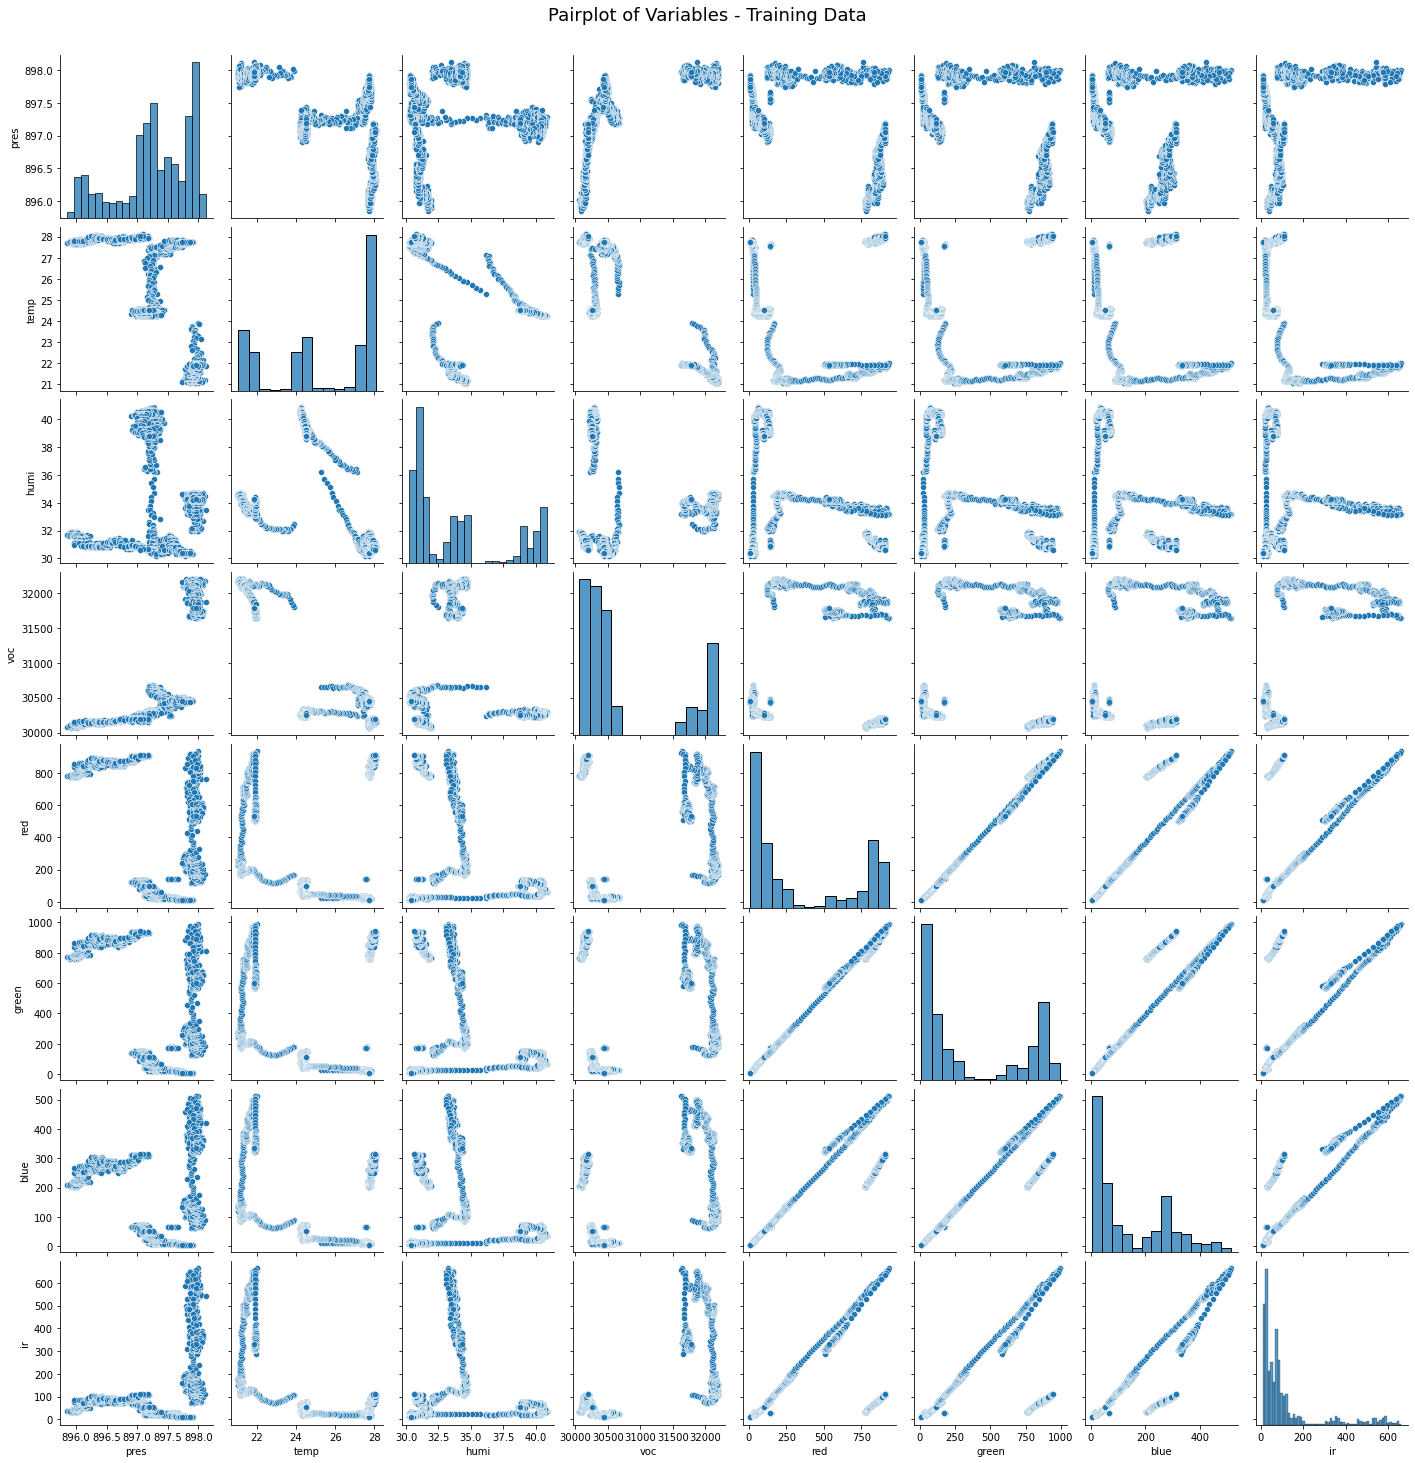

In [99]:
plot_pairplot(df_train, 'Training Data')

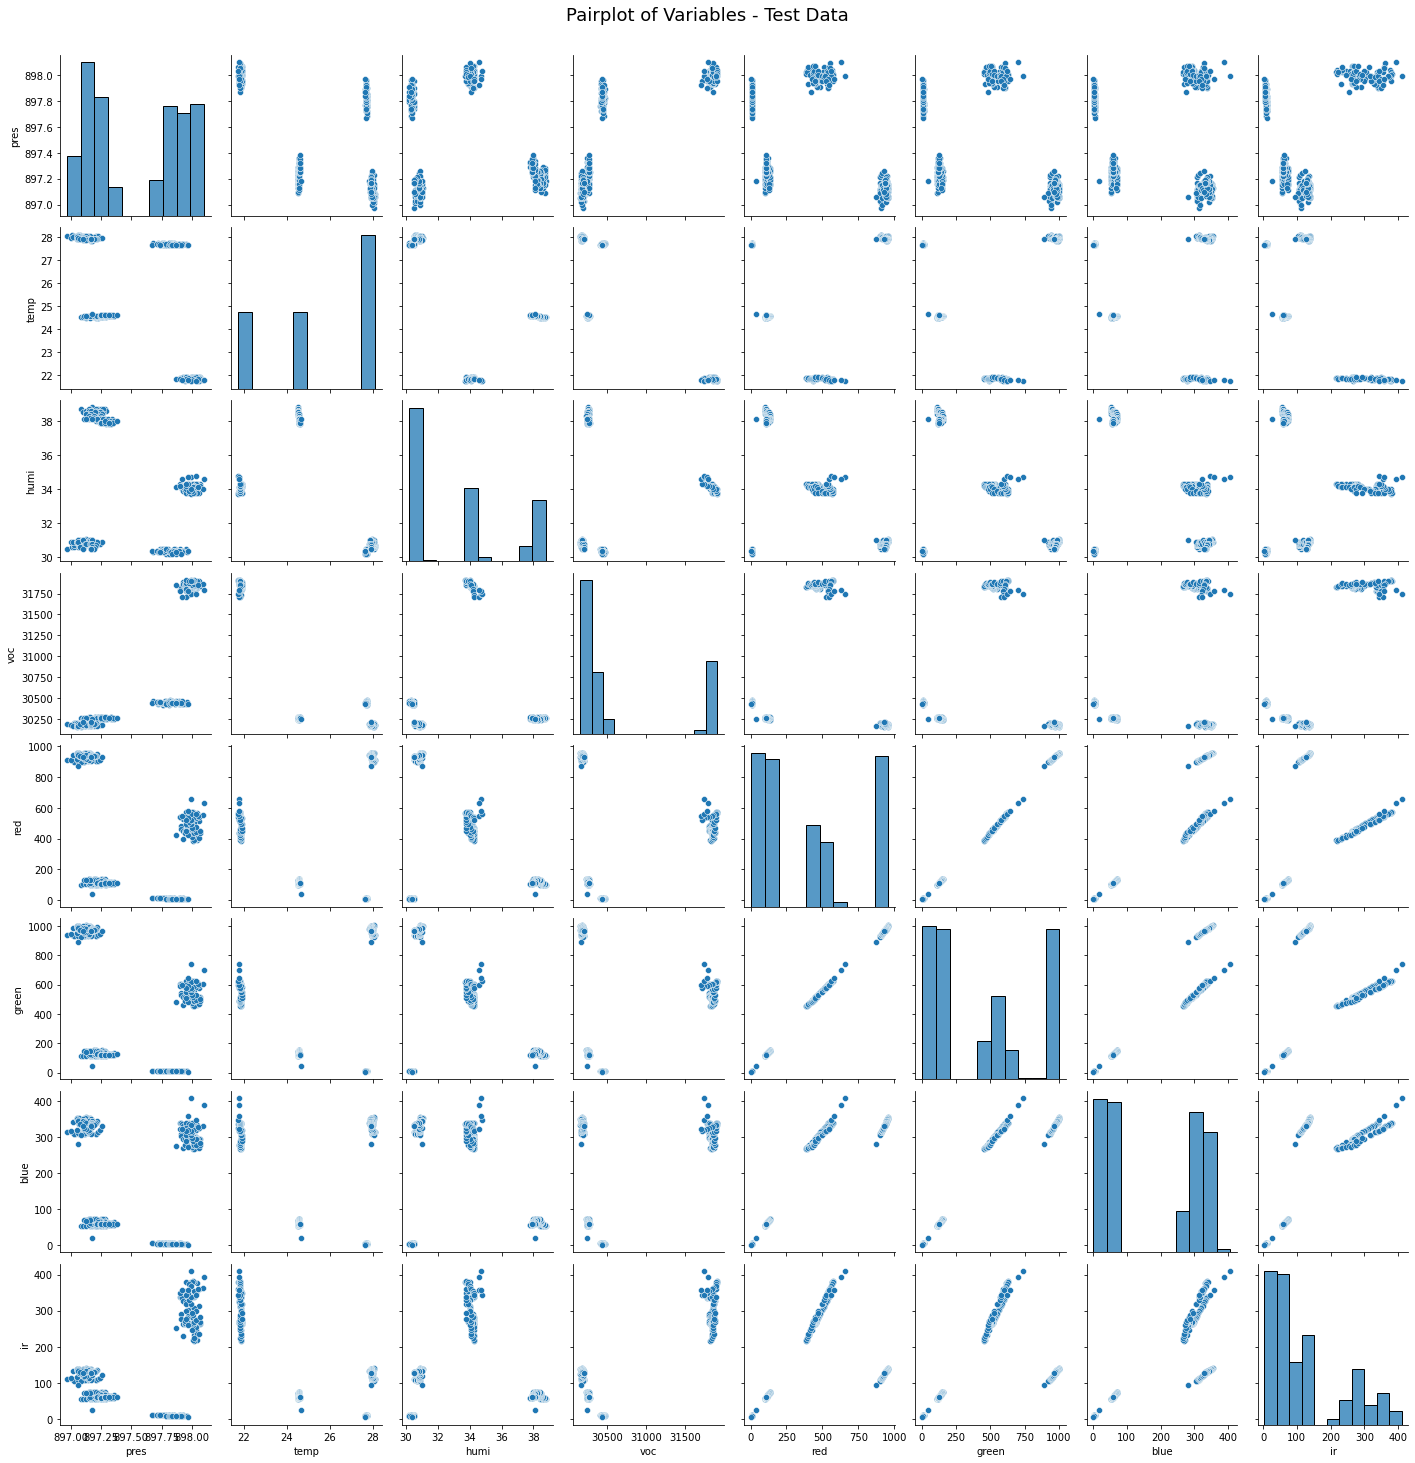

In [100]:
plot_pairplot(df_test, 'Test Data')

## Normalizing Data

In [144]:
scaled_train_df, df_mins, df_ranges = normalize_train_data(df_train)

In [148]:
scaled_test_df = normalize_test_data(df_test, df_mins, df_ranges)

In [149]:
scaled_test_df

pres      temp      humi       voc       red     green      blue  \
0    0.881057  0.947814  0.018692  0.178153  0.001083  0.002039  0.001969   
1    0.806167  0.947814  0.009346  0.186123  0.002167  0.002039  0.001969   
2    0.845815  0.949224  0.018692  0.182372  0.002167  0.002039  0.001969   
3    0.823789  0.950635  0.018692  0.176278  0.002167  0.002039  0.001969   
4    0.863436  0.950635  0.009346  0.176746  0.002167  0.002039  0.001969   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.911894  0.107193  0.411215  0.768870  0.581798  0.599388  0.627953   
396  0.942731  0.105783  0.420561  0.784341  0.704225  0.743119  0.793307   
397  0.960352  0.104372  0.429907  0.784341  0.596966  0.625892  0.675197   
398  0.933921  0.108604  0.420561  0.802625  0.618635  0.648318  0.696850   
399  0.991189  0.110014  0.411215  0.806845  0.671723  0.704383  0.753937   

           ir class  
0    0.001529   kit  
1    0.001529   kit  
2    0.001529   kit  
3    0.001529   kit  
4    0.001529   kit  
..        ...   ...  
395  0.530581  serv  
396  0.613150  serv  
397  0.510703  serv  
398  0.533639  serv  
399  0.588685  serv  

[400 rows x 9 columns]

## Saving Datasets

In [150]:
df_train_folder = "./data/pre-processed_dataset/train/"
df_test_folder = "./data/pre-processed_dataset/test/"

In [151]:
scaled_train_df.to_csv(df_train_folder+"scaled_train_df.csv", index=False)
scaled_test_df.to_csv(df_test_folder+"scaled_test_df.csv", index=False)